In [149]:
import random
import pandas as pd
from itertools import combinations, chain

import matplotlib.pyplot as plt
import numpy as np

In [150]:
countries = [
    'Argentina', 
    'Brazil', 
    'Colombia', 
    'Uraguay', 
    'Ecuador', 
    'Mexico', 
    'Panama', 
    'Morocco', 
    'Egypt', 
    'Spain', 
    'UK', 
    'Italy', 
    'France', 
    'Germany', 
    'Netherlands', 
    'Japan', 
    'South Korea', 
    "Australia", 
    'Turkey', 
    'New Zealand'
]

countriesratings = {
    'Argentina': 2140, 
    'Brazil': 1994, 
    'Colombia': 1953, 
    'Uraguay': 1922, 
    'Ecuador': 1911, 
    'Mexico': 1817, 
    'Panama': 1724, 
    'Morocco': 1807, 
    'Egypt': 1668, 
    'Spain': 2150, 
    'UK': 2012, 
    'Italy': 1914, 
    'France': 2031, 
    'Germany': 1988, 
    'Netherlands': 1967, 
    'Japan': 1875, 
    'South Korea': 1745, 
    "Australia": 1736, 
    'Turkey': 1837, 
    'New Zealand': 1596
}

In [151]:
def winrate(country1, country2):
    return (1/(1 + 10**((countriesratings[country2]-countriesratings[country1])/400)))

def simulate_match(country1, country2):
    # Randomly generate results: win, loss, or draw
    # result = random.choice(['win', 'loss', 'draw'])
    
    
    percent1 = winrate(country1, country2)
    
    
    if random.random() < percent1:
        result = 'win'
    else:
        result = 'loss'
    
    if result == 'win':
        return country1, 3, country2, 0  # country1 wins, gets 3 points, country2 gets 0
    elif result == 'loss':
        return country1, 0, country2, 3  # country2 wins, gets 3 points, country1 gets 0
    else:
        return country1, 1, country2, 1  # Draw, both get 1 point each

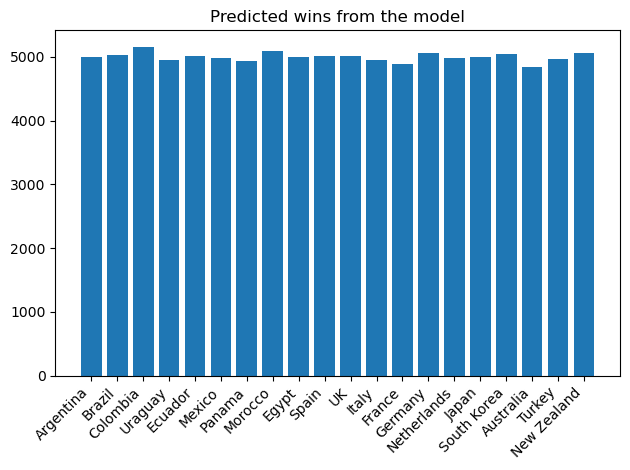

In [152]:
def elimination_bracket(countries):
    # Shuffle the countries to randomize the bracket
    random.shuffle(countries)
    
    # Initialize the current round
    current_round = countries
    round_number = 1
    
    while len(current_round) > 1:
        #print(f"Round {round_number}:")
        next_round = []
        
        # Pair up countries and simulate matches
        for i in range(0, len(current_round), 2):
            if i + 1 < len(current_round):
                country1 = current_round[i]
                country2 = current_round[i + 1]
                winner, _, _, _ = simulate_match(country1, country2)
                #print(f"{country1} vs {country2} -> Winner: {winner}")
                next_round.append(winner)
            else:
                # If odd number of countries, the last one advances automatically
                #print(f"{current_round[i]} advances automatically")
                next_round.append(current_round[i])
        
        # Move to the next round
        current_round = next_round
        round_number += 1
    
    # print(f"Champion: {current_round[0]}")
    return current_round[0]


# Run the elimination bracket
winners = {country: 0 for country in countries}
for i in range(99999):
    champion = elimination_bracket(countries)
    winners[champion] += 1

names = list(winners.keys())
values = list(winners.values())

plt.bar(names, values)
plt.title("Predicted wins from the model")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels and align them to the right for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()



